<a href="https://colab.research.google.com/github/hanarifdahs/hacktiv8/blob/main/h8dsft_P0W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Overview** daridataset yang digunakan adalah

**Objective** yang ingin dicapai adalah

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
df = pd.read_csv('Pokemon.csv')

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Data Cleaning

**Missing Value**

In [ ]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
df['Type 2'].isnull().sum()

386

In [ ]:
df['Type 2'].fillna('Not Exist', inplace=True)

In [ ]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [ ]:
df["Type 1"] = pd.Categorical(df["Type 1"])
df["Type 2"] = pd.Categorical(df["Type 2"])
df["Generation"] = pd.Categorical(df["Generation"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    category
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(3), int64(8), object(1)
memory usage: 61.2+ KB


# Data Exploration

In [ ]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Not Exist,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Apa aja pokemon yang legendary

In [ ]:
df[["Name","Legendary"]][df["Legendary"]==1]

,Name,Legendary
156,Articuno,True
157,Zapdos,True
158,Moltres,True
162,Mewtwo,True
163,MewtwoMega Mewtwo X,True
...,...,...
795,Diancie,True
796,DiancieMega Diancie,True
797,HoopaHoopa Confined,True
798,HoopaHoopa Unbound,True


Rata-rata total (attacks) legendary pokemon

In [ ]:
df.query("Legendary == 1").Total.mean()

637.3846153846154

Berapa banyak pokemon yang legendary di setiap generation (di plot)

In [ ]:
legend_plot = df.query("Legendary == 1").groupby("Generation")["Legendary"].sum()
legend_plot

Generation
1     6
2     5
3    18
4    13
5    15
6     8
Name: Legendary, dtype: int64

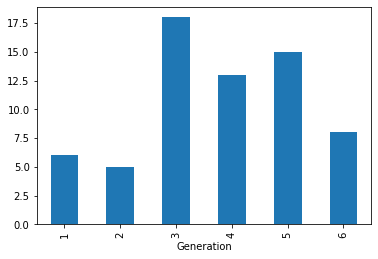

In [ ]:
# plt.figure(figsize = (10,6))
# plt.title("Pokemon Legendary per Generation")
# sns.barplot(data = df, x = "Generation", y = "Legendary == 1")
legend_plot.plot(kind = "bar")

Pokemon yang paling kuat per generation

In [ ]:
strongest = df.groupby("Generation")["Total"].max()
strongest

Generation
1    780
2    700
3    780
4    720
5    700
6    700
Name: Total, dtype: int64

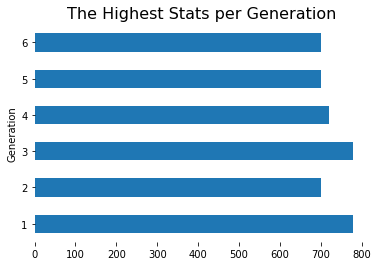

In [ ]:
ax = strongest.plot(kind = "barh")
ax.set_title("The Highest Stats per Generation", fontsize = 16)
sns.despine(bottom=True,left=True)

pokemon yang paling tinggi attacks (attack+sp.attack) dan defenses (defense+sp.defense) nya tapi gapunya type 2



In [ ]:
pokemon = df.copy()
pokemon['attacks'] = df['Attack'] + df['Sp. Atk']
pokemon['defenses'] = df['Defense'] + df['Sp. Def'] 
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,attacks,defenses
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114,114
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142,143
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182,183
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222,243
4,4,Charmander,Fire,Not Exist,309,39,52,43,60,50,65,1,False,112,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,200,300
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,320,220
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,260,190
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,330,190


In [ ]:
pokemon.loc[pokemon['Type 2'] == 'Not Exist','Name'].agg({'attacks': 'max','defenses' : 'max'})

attacks     Zorua
defenses    Zorua
Name: Name, dtype: object

rata-rata pokemon yang paling kuat pergenerasi

In [ ]:
# df.iloc[:,[1,-2,4]].groupby('Generation')['Total'].mean()
df.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

Text(0.5, 1.0, 'Average Total Stats Per Generation')

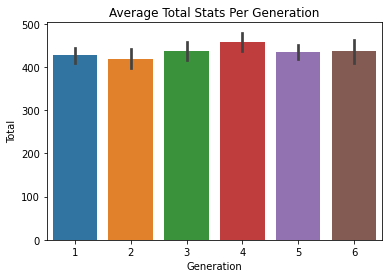

In [ ]:
sns.barplot(data=df,x = 'Generation',y='Total')
plt.title('Average Total Stats Per Generation')

# Summary